In [ ]:
import numpy as np
def sigmoid_function(x):
  return 1/ (1 + np.exp(-x))

In [ ]:
a = np.array([-10,1,10])

In [ ]:
sigmoid_function(a)

array([4.53978687e-05, 7.31058579e-01, 9.99954602e-01])

In [ ]:
a = np.array([13,14,15])
sigmoid_function(a)

array([0.99999774, 0.99999917, 0.99999969])

In [ ]:
a = np.array([13,14,15])
sigmoid_function(a / 15)

array([0.70405163, 0.71775106, 0.73105858])

In [ ]:
x = np.arange(-10,10,0.1)

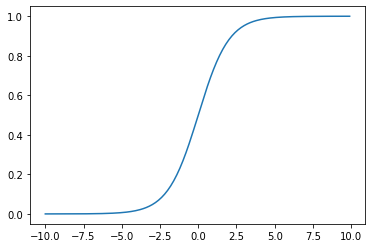

In [ ]:
from matplotlib import pyplot as plt
plt.plot(x, sigmoid_function(x))

In [ ]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)


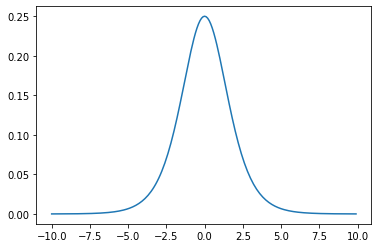

In [ ]:
plt.plot(x, dfunc(sigmoid_function, x))

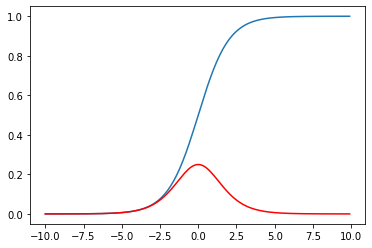

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
d_y = dfunc(sigmoid_function,x )
plt.plot(x,y)
plt.plot(x,d_y, c = 'red')

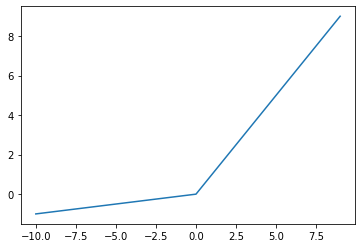

In [ ]:
import numpy as np
def leaky_relu(x, t= 0.1):
  return np.maximum(t * x, x)
x = np.arange(-10,10,1)
plt.plot(x, leaky_relu(x))

## SVM

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

clf1 = SVC(kernel="linear")
clf1.fit(X, y)

clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()




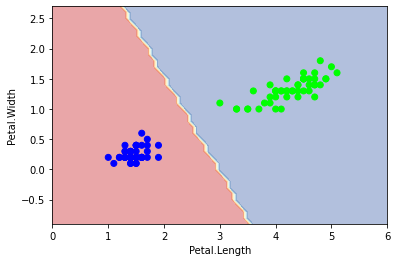

In [ ]:
 plot_estimator(clf1, X, y)

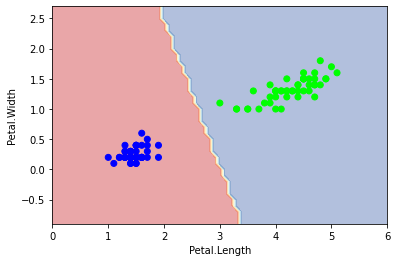

In [ ]:
 plot_estimator(clf2, X, y)

In [ ]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]




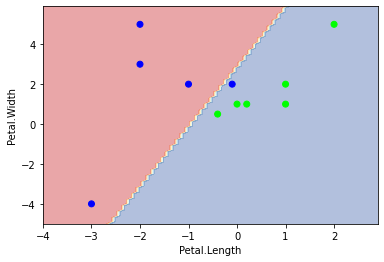

In [ ]:
# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

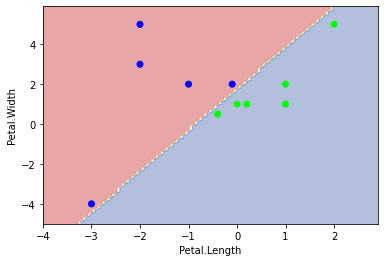

In [ ]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [ ]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target


In [ ]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

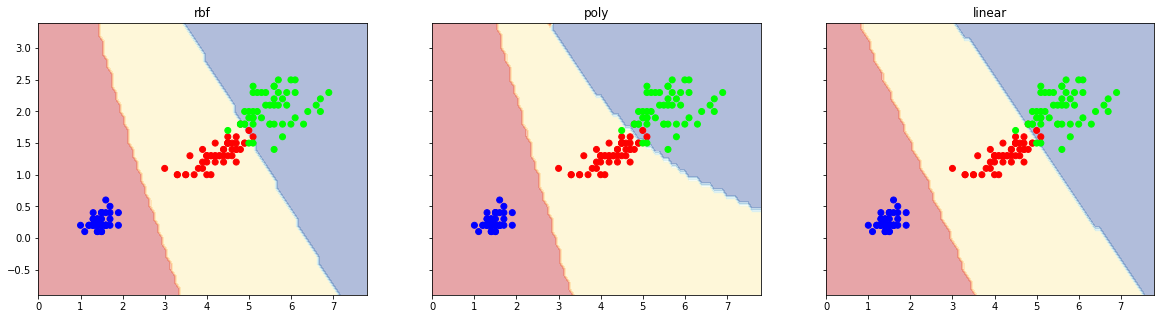

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)


## Tensorflow & Keras

In [ ]:
import tensorflow as tf

In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

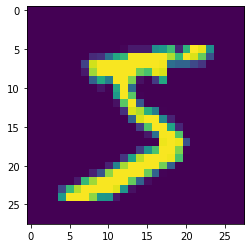

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [ ]:
n_classes  = 10 
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test  = tf.keras.utils.to_categorical(y_test, n_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense

model = Sequential()
#Dense, w * x + b
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [ ]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 3s 6ms/step - loss: 1.0529 - accuracy: 0.7537 - val_loss: 0.4860 - val_accuracy: 0.8774
Epoch 2/15
600/600 [==============================] - 3s 6ms/step - loss: 0.4233 - accuracy: 0.8859 - val_loss: 0.3543 - val_accuracy: 0.9019
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.3434 - accuracy: 0.9033 - val_loss: 0.3092 - val_accuracy: 0.9136
Epoch 4/15
600/600 [==============================] - 3s 6ms/step - loss: 0.3066 - accuracy: 0.9131 - val_loss: 0.2817 - val_accuracy: 0.9219
Epoch 5/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2818 - accuracy: 0.9197 - val_loss: 0.2619 - val_accuracy: 0.9283
Epoch 6/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2624 - accuracy: 0.9258 - val_loss: 0.2479 - val_accuracy: 0.9309
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2470 - accuracy: 0.9298 - val_loss: 0.2359 - val_accuracy: 0.9342
Epoch 

In [ ]:
history2= model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=3,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/3
600/600 [==============================] - 3s 5ms/step - loss: 0.1607 - accuracy: 0.9543 - val_loss: 0.1625 - val_accuracy: 0.9512
Epoch 2/3
600/600 [==============================] - 3s 5ms/step - loss: 0.1548 - accuracy: 0.9562 - val_loss: 0.1566 - val_accuracy: 0.9539
Epoch 3/3
600/600 [==============================] - 3s 6ms/step - loss: 0.1487 - accuracy: 0.9578 - val_loss: 0.1510 - val_accuracy: 0.9556


In [ ]:
model.save('model.h5')

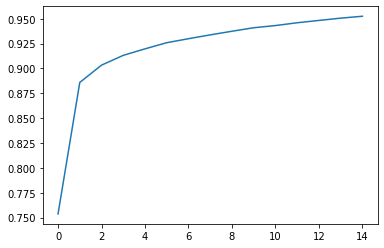

In [ ]:
from matplotlib import pyplot as plt
data = history.history['accuracy']
plt.plot(range(len(data)), data)

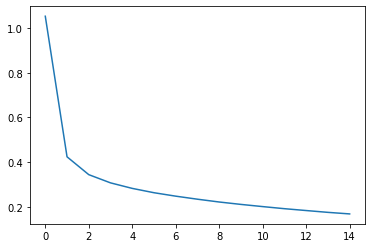

In [ ]:
from matplotlib import pyplot as plt
data = history.history['loss']
plt.plot(range(len(data)), data)

In [ ]:
predicted = np.argmax(model.predict(x_test), axis = 1)

In [ ]:
y_hat = np.argmax(y_test, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_hat, predicted)

0.9556

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_hat, predicted)

array([[ 962,    0,    0,    3,    0,    4,    7,    1,    2,    1],
       [   0, 1120,    2,    2,    0,    1,    3,    2,    5,    0],
       [   6,    1,  983,   10,    5,    1,    8,    9,    7,    2],
       [   1,    0,    3,  981,    0,    6,    1,    9,    7,    2],
       [   1,    1,    4,    2,  937,    0,    8,    2,    3,   24],
       [   9,    1,    0,   22,    1,  834,   12,    1,    9,    3],
       [  11,    3,    3,    0,    9,   10,  919,    0,    3,    0],
       [   0,   10,   18,    5,    3,    1,    0,  979,    1,   11],
       [   4,    3,    6,   18,    6,    7,   11,   10,  907,    2],
       [   8,    8,    1,   13,   21,    5,    1,   14,    4,  934]])

## Fashion Mnist

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images.reshape(60000, 784)
test_images  = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images  = test_images.astype('float32')

train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
n_classes  = 10 
train_labels = tf.keras.utils.to_categorical(train_labels, n_classes)
test_labels  = tf.keras.utils.to_categorical(test_labels, n_classes)

In [ ]:
model = Sequential()
#Dense, w * x + b
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7254 - accuracy: 0.7604
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4840 - accuracy: 0.8319
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4398 - accuracy: 0.8455
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4121 - accuracy: 0.8556
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3929 - accuracy: 0.8619
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8682
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3628 - accuracy: 0.8707
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3516 - accuracy: 0.8746
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3412 - accuracy: 0.8788
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.331

## Churn Analysis

In [104]:
import pandas
churn = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fubondl/main/data/customer_churn.csv', index_col = 0)

In [105]:
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [106]:
churn.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [107]:
churn = churn.iloc[:,3:]

In [108]:
churn.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [109]:
churn.select_dtypes('object').head()

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no
4,yes,no,no
5,yes,no,no


In [110]:
churn['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [112]:
churn['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [113]:
churn['churn'].unique()

array(['no', 'yes'], dtype=object)

In [114]:
churn['international_plan']  = churn['international_plan'].replace({'yes': 1, 'no': 0 })
churn['voice_mail_plan']  = churn['voice_mail_plan'].replace({'yes': 1, 'no': 0 })
churn['churn']  = churn['churn'].replace({'yes': 1, 'no': 0 })

In [115]:
churn.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [116]:
X = churn.iloc[:, :-1]
y = churn.iloc[:, -1]

In [117]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size= 0.33, random_state = 42)

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)

In [122]:
train_X[0:3]

array([[-0.32388048, -0.61444668, -0.588063  ,  0.77147521,  0.314915  ,
         0.77174512, -0.03377037,  0.08275265, -0.03359355, -0.75309352,
         0.36453444, -0.75223147, -0.29709755, -0.59360595, -0.2950804 ,
         0.32849284],
       [-0.32388048,  1.62748051,  1.16095039, -0.81118212, -2.03443414,
        -0.81156415,  0.63307906, -1.11651189,  0.63255127,  0.19256189,
         1.08099841,  0.19384146, -0.29709755, -0.18562747, -0.2950804 ,
        -0.42538641],
       [-0.32388048,  1.62748051,  2.25408377, -1.78978579,  0.61483191,
        -1.79006223,  0.45946146, -1.86605222,  0.45847161, -0.72955023,
        -0.60780951, -0.73043255, -0.26121768, -1.40956292, -0.25521625,
         1.08237208]])

In [120]:
test_X = sc.transform(test_X)

In [123]:
test_X[0:3]

array([[-0.32388048, -0.61444668, -0.588063  , -0.46050051, -0.38489113,
        -0.46055766,  2.55471024,  0.28263008,  2.55439068, -0.22336954,
         1.1833504 , -0.22469771,  1.1739772 , -0.59360595,  1.17989314,
        -0.42538641],
       [-0.32388048, -0.61444668, -0.588063  , -1.303238  ,  0.81477651,
        -1.30297323,  0.32135655,  1.18207848,  0.32152895, -0.24298895,
         2.10451835, -0.24213685,  0.9228181 ,  0.6303295 ,  0.92742019,
        -1.17926566],
       [-0.32388048, -0.61444668, -0.588063  , -3.30634607, -5.03360326,
        -3.30641026, -0.81899543,  1.48189462, -0.81811254, -0.66088231,
        -0.60780951, -0.66067602, -1.22997423, -1.40956292, -1.22524389,
         1.83625133]])

In [125]:
train_X.shape

(2233, 16)

In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense

In [133]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape = (16,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [134]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [136]:
model.fit(train_X, train_y,
          batch_size = 32,
          epochs = 15,
          verbose = 1,
          validation_data = (test_X, test_y))

Epoch 1/15
70/70 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.6798 - val_loss: 0.5383 - val_accuracy: 0.8145
Epoch 2/15
70/70 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8464 - val_loss: 0.4853 - val_accuracy: 0.8545
Epoch 3/15
70/70 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.8554 - val_loss: 0.4608 - val_accuracy: 0.8545
Epoch 4/15
70/70 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8554 - val_loss: 0.4447 - val_accuracy: 0.8545
Epoch 5/15
70/70 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8554 - val_loss: 0.4327 - val_accuracy: 0.8545
Epoch 6/15
70/70 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8554 - val_loss: 0.4228 - val_accuracy: 0.8545
Epoch 7/15
70/70 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8554 - val_loss: 0.4144 - val_accuracy: 0.8545
Epoch 8/15
70/70 [==

## Choose Optimzers

In [145]:
def tarinProcess(optimizer):
    model = Sequential()
    model.add(Dense(units = 8, activation = 'relu', input_dim = 16))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(train_X, train_y,
                        batch_size=32,
                        epochs=200,
                        verbose=0,
                        validation_data=(test_X, test_y))
    return history

In [146]:
history1 = tarinProcess('sgd')

In [147]:
history2 = tarinProcess('RMSprop')

In [148]:
history3 = tarinProcess('Adagrad')

In [149]:
history4 = tarinProcess('Adadelta')

In [150]:
history5 = tarinProcess('Adam')

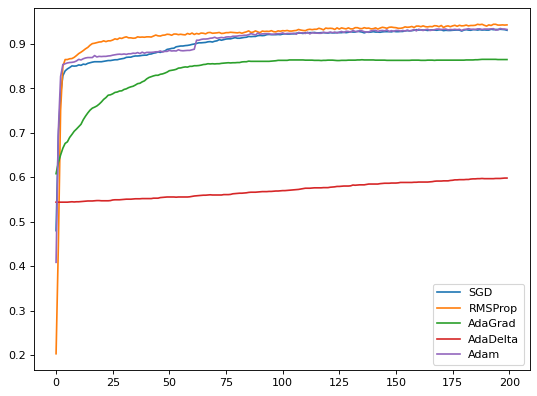

In [151]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history.get('accuracy'), label='SGD')
plt.plot(history2.epoch, history2.history.get('accuracy'), label='RMSProp')
plt.plot(history3.epoch, history3.history.get('accuracy'), label='AdaGrad')
plt.plot(history4.epoch, history4.history.get('accuracy'), label='AdaDelta')
plt.plot(history5.epoch, history5.history.get('accuracy'), label='Adam')
plt.legend()
plt.show()

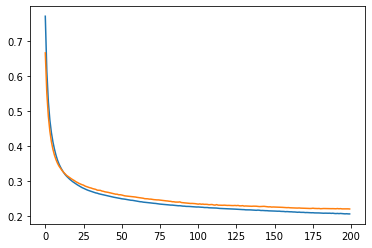

In [174]:
plt.plot(range(len(history5.history.get('loss'))), history5.history.get('loss'))
plt.plot(range(len(history5.history.get('val_loss'))), history5.history.get('val_loss'))

## Cross Validation

In [153]:
def buildClassifier(optimizer):
  model = Sequential()
  model.add(Dense(units = 8, activation = 'relu', input_dim = 16))
  model.add(Dense(units = 1, activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  return model

In [155]:
from sklearn.model_selection import cross_val_score
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 10, 
                                                            epochs = 10, 
                                                            verbose = 0, 
                                                            optimizer = 'sgd')
accuracies = cross_val_score(estimator = classifier, X = train_X, y = train_y, cv = 5)

In [156]:
accuracies

array([0.8389262 , 0.85906041, 0.87919462, 0.85650223, 0.86098653])

In [157]:
accuracies.mean()

0.8589339971542358

In [158]:
accuracies.std()

0.01281364250922094

In [159]:
from sklearn.model_selection import cross_val_score
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 10, 
                                                            epochs = 10, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = train_X, y = train_y, cv = 5)

In [160]:
accuracies.mean()

0.8920696973800659

In [161]:
accuracies.std()

0.006139551011417516

## Dropout

In [162]:
from tensorflow.keras.layers import Dropout
def buildClassifierWithDropout(optimizer):
  model = Sequential()
  model.add(Dense(units = 8, activation = 'relu', input_dim = 16))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(units = 1, activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  return model

In [163]:
from sklearn.model_selection import cross_val_score
classifier2 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifierWithDropout, 
                                                            batch_size = 10, 
                                                            epochs = 10, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies2 = cross_val_score(estimator = classifier2, X = train_X, y = train_y, cv = 5)

In [165]:
accuracies2.mean()

0.8777339696884155

In [166]:
accuracies2.std()

0.010847618767360317

In [167]:
from tensorflow.keras.layers import Dropout
def buildClassifierWithDropoutAndRegularizer(optimizer):
  model = Sequential()
  model.add(Dense(units = 8, activation = 'relu', input_dim = 16,
            kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
            bias_regularizer=regularizers.l2(1e-4),
            activity_regularizer=regularizers.l2(1e-5)))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(units = 1, activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  return model


In [169]:
from tensorflow.keras import regularizers
from sklearn.model_selection import cross_val_score
classifier3 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifierWithDropoutAndRegularizer, 
                                                            batch_size = 10, 
                                                            epochs = 10, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies3 = cross_val_score(estimator = classifier3, X = train_X, y = train_y, cv = 5)

In [170]:
accuracies3.mean()

0.8741515517234802

In [171]:
accuracies3.std()

0.01316591352308667

## Prevent Overfitting
- https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html

## Grid Search v.s. Random Search

In [176]:
from sklearn.model_selection import GridSearchCV

classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifierWithDropout, 
    epochs = 10,verbose = 0)

parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2)

grid_search     = grid_search.fit(train_X, train_y)
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [177]:
best_parameters

{'batch_size': 10, 'optimizer': 'rmsprop'}

In [178]:
best_accuracy

0.8768490708920142

In [181]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [180]:
?RandomizedSearchCV

## Comparing Model

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense

model = Sequential()
#Dense, w * x + b
model.add(Dense(8, activation='relu', input_shape=(16,)))
model.add(Dropout(rate = 0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(1, activation='sigmoid'))

In [188]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [189]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_23 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_109 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_24 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [190]:
history = model.fit(train_X, train_y,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_data=(test_X, test_y))

Epoch 1/30
70/70 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5638 - val_loss: 0.5482 - val_accuracy: 0.7727
Epoch 2/30
70/70 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7864 - val_loss: 0.4327 - val_accuracy: 0.8427
Epoch 3/30
70/70 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8245 - val_loss: 0.3792 - val_accuracy: 0.8527
Epoch 4/30
70/70 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8468 - val_loss: 0.3537 - val_accuracy: 0.8555
Epoch 5/30
70/70 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8473 - val_loss: 0.3401 - val_accuracy: 0.8564
Epoch 6/30
70/70 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8580 - val_loss: 0.3288 - val_accuracy: 0.8609
Epoch 7/30
70/70 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8554 - val_loss: 0.3201 - val_accuracy: 0.8627
Epoch 8/30
70/70 [==

In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred_y = (model.predict(test_X) > 0.6).flatten().astype(int)

In [203]:
accuracy_score(test_y, pred_y)

0.9036363636363637

In [204]:
confusion_matrix(test_y, pred_y)

array([[937,   3],
       [103,  57]])

In [197]:
14 * 12000 

168000

In [198]:
81 * 1000

81000

In [206]:
from sklearn.metrics import roc_curve, auc
p_y = model.predict(test_X)
fpr, tpr, threshold = roc_curve(test_y, p_y)

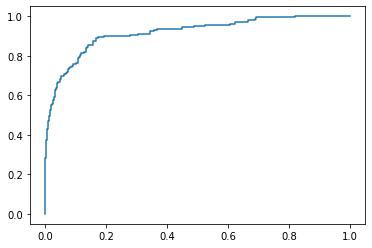

In [209]:
plt.plot(fpr, tpr)

In [210]:
auc(fpr, tpr)

0.9175066489361702

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

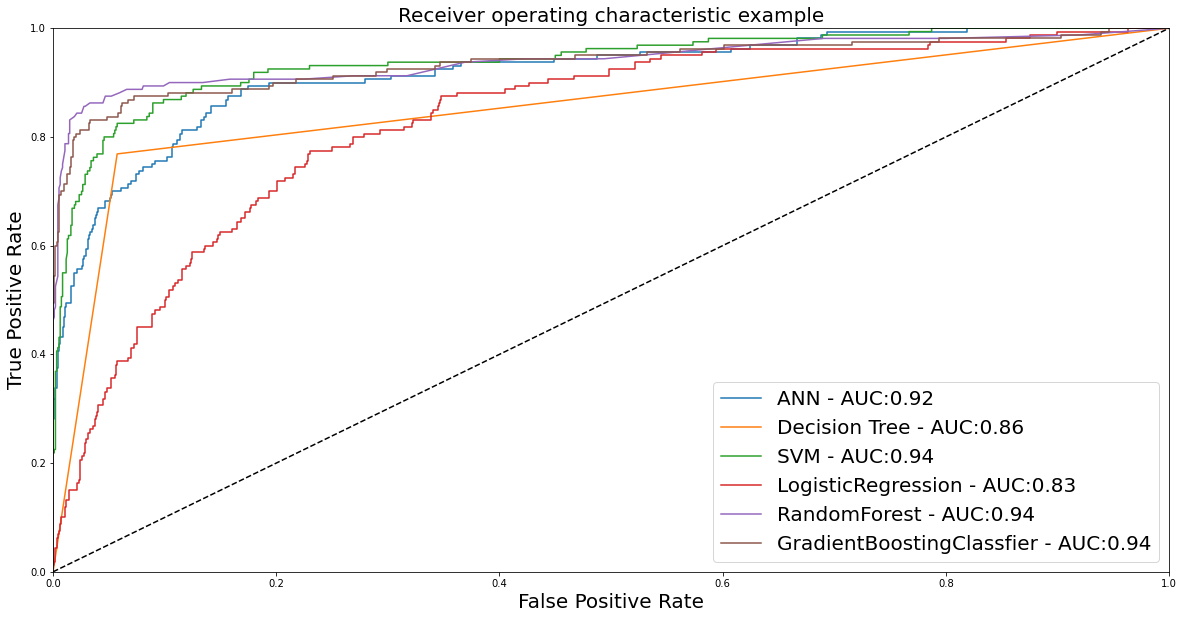

In [212]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4, clf5], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoostingClassfier']):
    if title != 'ANN':
        probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        pred_y = clf.predict(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, pred_y)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 作業 

目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [214]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fubondl/master/data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
